In [3]:
import random
import numpy as np

fileset_training, fileset_validation = random.sample([1,2,3,4],2)
print ('Validation Dataset:', fileset_validation)

from index_getdata import getData

X_train = []
y_train = []
train_iter = 0
for i in range(1,5):
    if i != fileset_validation:
        obj_train = getData(verbose=0)
        obj_train.get_data_training(i)
        X_train_temp = obj_train.X_train
        y_train_temp = obj_train.y_train
        print ('Raw Data Shapes:', X_train_temp.shape, y_train_temp.shape)

        if train_iter == 0:
            train_iter += 1
            temp_shape = X_train_temp[1].shape
            X_train = np.append(X_train_temp, X_train_temp[1].reshape(1, temp_shape[0], temp_shape[1], temp_shape[2]), axis = 0)
            temp_shape = y_train_temp[1].shape
            y_train = np.append(y_train_temp, y_train_temp[1].reshape(1, temp_shape[0]), axis=0)
        else:
            X_train = np.append(X_train, X_train_temp, axis=0)
            y_train = np.append(y_train, y_train_temp, axis=0)
        print ('Final Raw Data Shapes:', X_train.shape, y_train.shape)
        
    else:
        obj_validate = getData(verbose=0)
        obj_validate.get_data_training(fileset_validation)
        X_validate = obj_validate.X_train
        y_validate = obj_validate.y_train
        print ('Validation Data Shapes:', X_validate.shape, y_validate.shape)
        

Validation Dataset: 1
-------------------------------------------------> Dataset to be pulled: 1
Validation Data Shapes: (6250, 1, 100, 100) (6250, 2)
-------------------------------------------------> Dataset to be pulled: 2
Raw Data Shapes: (6250, 1, 100, 100) (6250, 2)
Final Raw Data Shapes: (6251, 1, 100, 100) (6251, 2)
-------------------------------------------------> Dataset to be pulled: 3
Raw Data Shapes: (6250, 1, 100, 100) (6250, 2)
Final Raw Data Shapes: (12501, 1, 100, 100) (12501, 2)
-------------------------------------------------> Dataset to be pulled: 4
Raw Data Shapes: (6250, 1, 100, 100) (6250, 2)
Final Raw Data Shapes: (18751, 1, 100, 100) (18751, 2)


Idx: 11875
Class: [ 0.  1.]
cat


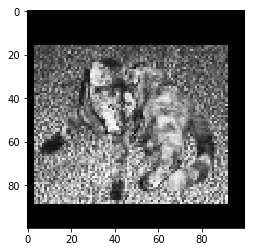

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

idx_random = np.random.randint(0, len(X_train))
X_train_temp = X_train[idx_random][0]
y_train_temp = y_train[idx_random]
plt.imshow(X_train_temp, cmap = plt.cm.gray)
print ('Idx:', idx_random)
print ('Class:', y_train_temp)
print ('cat' if y_train_temp[1] == 1 else 'dog')

In [ ]:
# obj_temp = getData(verbose=0)
# obj_temp.get_data_training(1)
obj_temp.validate_data(1)

In [26]:
"""
URL : https://github.com/fchollet/keras/blob/master/examples/cifar10_cnn.py
"""
import numpy as np
np.random.seed(7)

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D as Conv2D, MaxPooling2D
from keras.models import model_from_json

model = Sequential()
model.add((Conv2D(32, (3, 3), padding='same',input_shape=X_train.shape[1:],data_format='channels_first')))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

X_train = X_train.astype('float32')
X_train /= 255          
model.fit(X_train, y_train, batch_size=64, epochs = 30, verbose=1, shuffle=True)

Epoch 1/30
18751/18751 [==============================] - 328s - loss: 0.6787 - acc: 0.5666   
Epoch 2/30
18751/18751 [==============================] - 303s - loss: 0.6454 - acc: 0.6252   
Epoch 3/30
18751/18751 [==============================] - 307s - loss: 0.6262 - acc: 0.6488   
Epoch 4/30
18751/18751 [==============================] - 297s - loss: 0.6160 - acc: 0.6578   
Epoch 5/30
18751/18751 [==============================] - 273s - loss: 0.6053 - acc: 0.6684   
Epoch 6/30
18751/18751 [==============================] - 344s - loss: 0.5944 - acc: 0.6773   
Epoch 7/30
18751/18751 [==============================] - 133s - loss: 0.5827 - acc: 0.6876   
Epoch 8/30
18751/18751 [==============================] - 133s - loss: 0.5708 - acc: 0.7000   
Epoch 9/30
18751/18751 [==============================] - 133s - loss: 0.5569 - acc: 0.7138   
Epoch 10/30
18751/18751 [==============================] - 133s - loss: 0.5460 - acc: 0.7186   
Epoch 11/30
18751/18751 [========================

In [27]:
model.evaluate(X_validate, y_validate, verbose=1)

6250/6250 [==============================] - 14s    


[4.87211407043457, 0.68832000001907345]

In [28]:
model.metrics_names

['loss', 'acc']

In [ ]:
# serialize model to JSON
model_json = model.to_json()
filename = 'index_cifar10_keras'
with open(filename + ".json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(filename + ".h5")
print("Saved model to disk")

# load json and create model
json_file = open(filename + '.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(filename + ".h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))